In [120]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [121]:
train = pd.read_csv('train_full.csv')
test = pd.read_csv('test_full.csv')

In [122]:
data = pd.concat([train,test])

In [123]:
data = data.drop(['Unnamed: 0','month'], axis = 1)

In [124]:
data.head()

,team,opp,host,year,toss,day_match,bat_first,format,fow,score,rpo,result
0,australia,south_africa,sri_lanka,2012,1,0,0,1,5,146,7.30,1
1,india,australia,india,2020,0,0,1,0,6,340,6.80,1
2,canada,scotland,scotland,2009,1,1,0,0,4,286,5.72,1
3,australia,england,australia,1987,1,1,1,0,6,225,4.50,1
4,new_zealand,pakistan,uae,2009,0,0,0,1,5,153,7.65,0


In [125]:
print(data.team.value_counts())

india           1027
pakistan         969
australia        945
sri_lanka        911
west_indis       805
new_zealand      802
england          773
south_africa     655
zimbambave       564
bangladesh       299
ireland          221
afganistan       163
netherlands      148
scotland         139
kenya            122
uae               96
canada            88
bermuda           44
usa               23
Name: team, dtype: int64


In [126]:
data = pd.get_dummies(data)

In [127]:
data

,year,toss,day_match,bat_first,format,fow,score,rpo,result,team_afganistan,...,host_netherlands,host_new_zealand,host_pakistan,host_scotland,host_south_africa,host_sri_lanka,host_uae,host_usa,host_west_indis,host_zimbambave
0,2012,1,0,0,1,5,146,7.30,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2020,0,0,1,0,6,340,6.80,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,1,1,0,0,4,286,5.72,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1987,1,1,1,0,6,225,4.50,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,0,0,0,1,5,153,7.65,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,2017,0,1,0,0,10,111,2.85,1,0,...,0,0,0,0,0,0,0,0,0,1
963,1999,0,0,0,0,5,323,6.46,0,0,...,0,0,0,0,0,0,1,0,0,0
964,1988,0,1,1,0,8,164,4.20,0,0,...,0,0,0,0,0,0,0,0,0,0
965,2018,0,0,0,0,8,271,5.42,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
data['toss'].corr(data['result'])

-0.004322376925988122

In [129]:
data['bat_first'].corr(data['result'])

-0.01954957279190149

In [130]:
X = data.drop(['result'], axis = 1)
y = data.result

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [132]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
global_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
importances = pd.DataFrame(global_importances, columns=['Values'])
importances = importances.sort_values(by='Values',ascending=False)
print(importances)

                 Values
rpo            0.160504
score          0.157895
year           0.122799
fow            0.092210
bat_first      0.056967
...                 ...
opp_usa        0.000950
host_usa       0.000724
host_malaysia  0.000646
team_usa       0.000638
host_bermuda   0.000471

[65 rows x 1 columns]


Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

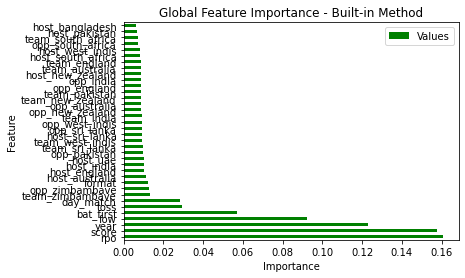

In [134]:
importances = importances[importances.Values > 0.005]
importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")